# PJM Electricity Load Forecasting - Exploratory Data Analysis (EDA)

Dataset: PJME_hourly.csv  
Goal: Explore hourly load patterns and data quality for forecasting.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("PJME_hourly.csv")
df.head()


,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [4]:
print("Shape:", df.shape)
df.info()
df.describe()


Shape: (145366, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145366 entries, 0 to 145365
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  145366 non-null  object 
 1   PJME_MW   145366 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.2+ MB


,PJME_MW
count,145366.000000
mean,32080.222831
std,6464.012166
min,14544.000000
25%,27573.000000
50%,31421.000000
75%,35650.000000
max,62009.000000


In [5]:
df["Datetime"] = pd.to_datetime(df["Datetime"])
df = df.sort_values("Datetime").set_index("Datetime")
df.head()


,PJME_MW
Datetime,
2002-01-01 01:00:00,30393.0
2002-01-01 02:00:00,29265.0
2002-01-01 03:00:00,28357.0
2002-01-01 04:00:00,27899.0
2002-01-01 05:00:00,28057.0


In [6]:
df.isna().sum()


,0
PJME_MW,0


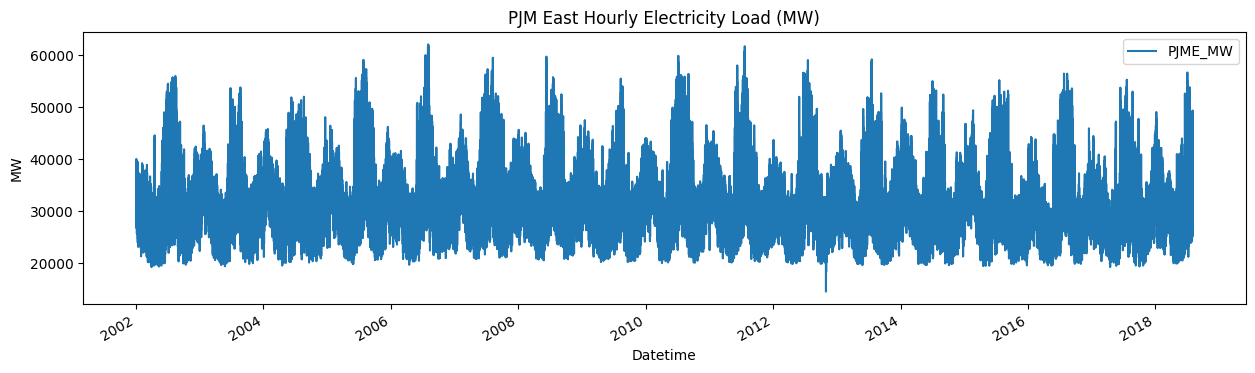

In [7]:
df.plot(figsize=(15,4))
plt.title("PJM East Hourly Electricity Load (MW)")
plt.ylabel("MW")
plt.show()


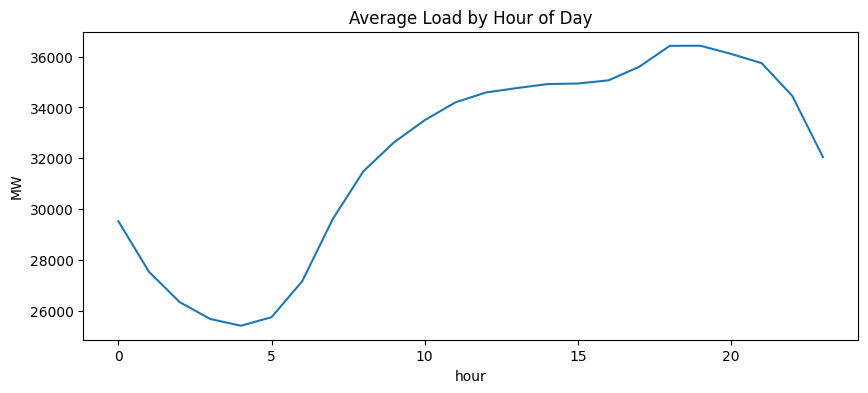

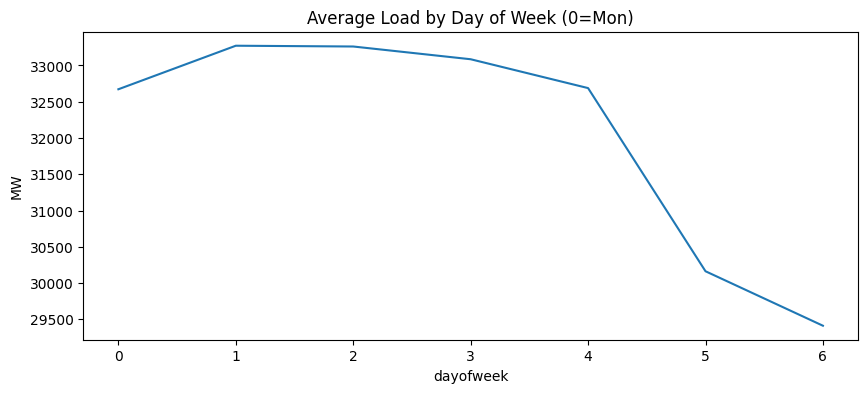

In [8]:
df["hour"] = df.index.hour
df["dayofweek"] = df.index.dayofweek

df.groupby("hour")["PJME_MW"].mean().plot(figsize=(10,4))
plt.title("Average Load by Hour of Day")
plt.ylabel("MW")
plt.show()

df.groupby("dayofweek")["PJME_MW"].mean().plot(figsize=(10,4))
plt.title("Average Load by Day of Week (0=Mon)")
plt.ylabel("MW")
plt.show()
